In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

plt.rcParams["figure.figsize"] = (14, 8)  # Figure size and width

In [18]:
# Import data
data_set = pd.read_csv("M2.module_2_data.csv")

In [3]:
print(data_set.head()) 

       Date       DXY    METALS       OIL    US_STK  INTL_STK   X13W_TB  \
0  1/4/2016  0.002433  0.024283 -0.007559 -0.013980 -0.019802  0.047297   
1  1/5/2016  0.005361 -0.004741 -0.021491  0.001691 -0.001263  0.322581   
2  1/6/2016 -0.002213  0.013642 -0.055602 -0.012614 -0.015171  0.000000   
3  1/7/2016 -0.009679  0.035249 -0.020606 -0.023992 -0.019255 -0.073171   
4  1/8/2016  0.003258 -0.028064 -0.003306 -0.010977 -0.010471  0.000000   

   X10Y_TBY    EURUSD  YEAR  
0 -0.010577 -0.007316  2016  
1  0.001336 -0.002436  2016  
2 -0.031584 -0.006978  2016  
3 -0.011024  0.002512  2016  
4 -0.010683  0.013636  2016  


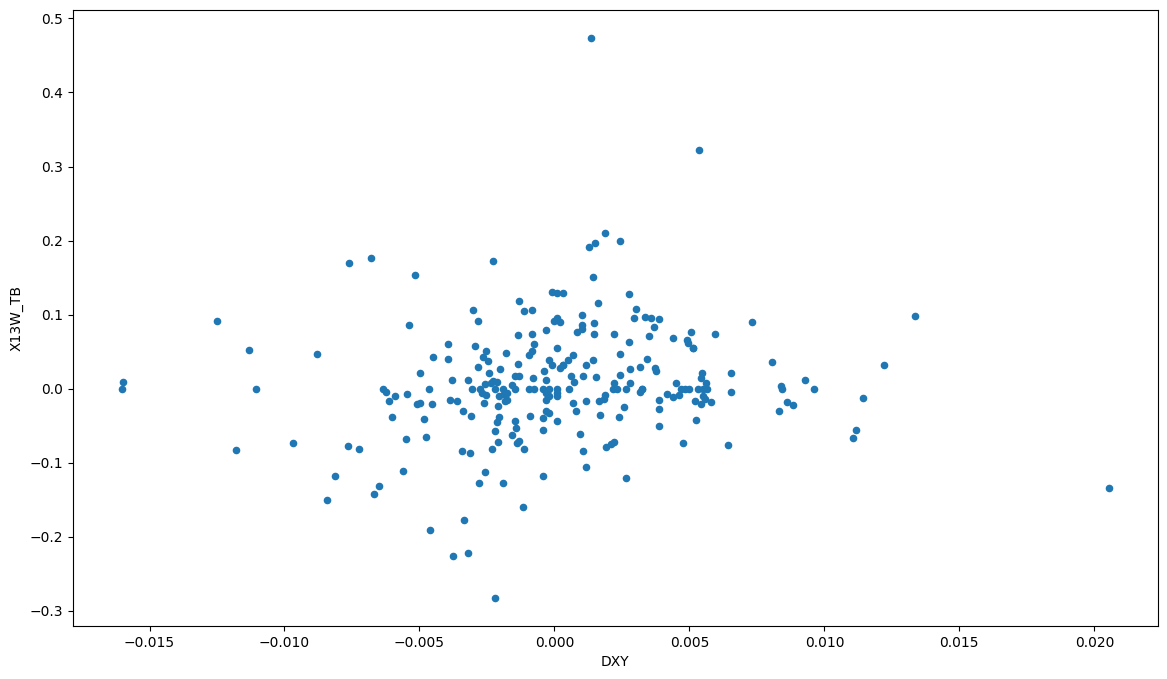

In [5]:
# Create scatter plot
scatt = data_set.plot.scatter(x="DXY", y="X13W_TB")
scatt.set(xlabel="DXY", ylabel="X13W_TB")
plt.show()

From figure 1 we can see that as DXY increases, X13W_TB does too. The plot exhibit a "megaphone pattern", which
means that, perhaps is suitable a WLS rather than OLS. WLS are ideal to tackle the heteroskedasticity problem.

In [6]:
# OLS model
model_1 = smf.ols("DXY ~ X13W_TB", data=data_set).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DXY   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4.160
Date:                Sun, 23 Nov 2025   Prob (F-statistic):             0.0424
Time:                        20:22:11   Log-Likelihood:                 985.02
No. Observations:                 250   AIC:                            -1966.
Df Residuals:                     248   BIC:                            -1959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001      0.000      0.338      0.736      -0.000       0.001
X13W_TB        0.0075      0.004      2.040      0.042       0.000       0.015
==============================================================================
Omnibus:                       19.112   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.847
Skew:                           0.168   Prob(JB):                     1.67e-13
Kurtosis:                       5.353   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Parameters with high precision
print(model_1.summary2().tables[1])

              Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
Intercept  0.000101  0.000300  0.337774  0.735819 -0.000490  0.000693
X13W_TB    0.007470  0.003662  2.039638  0.042446  0.000257  0.014684


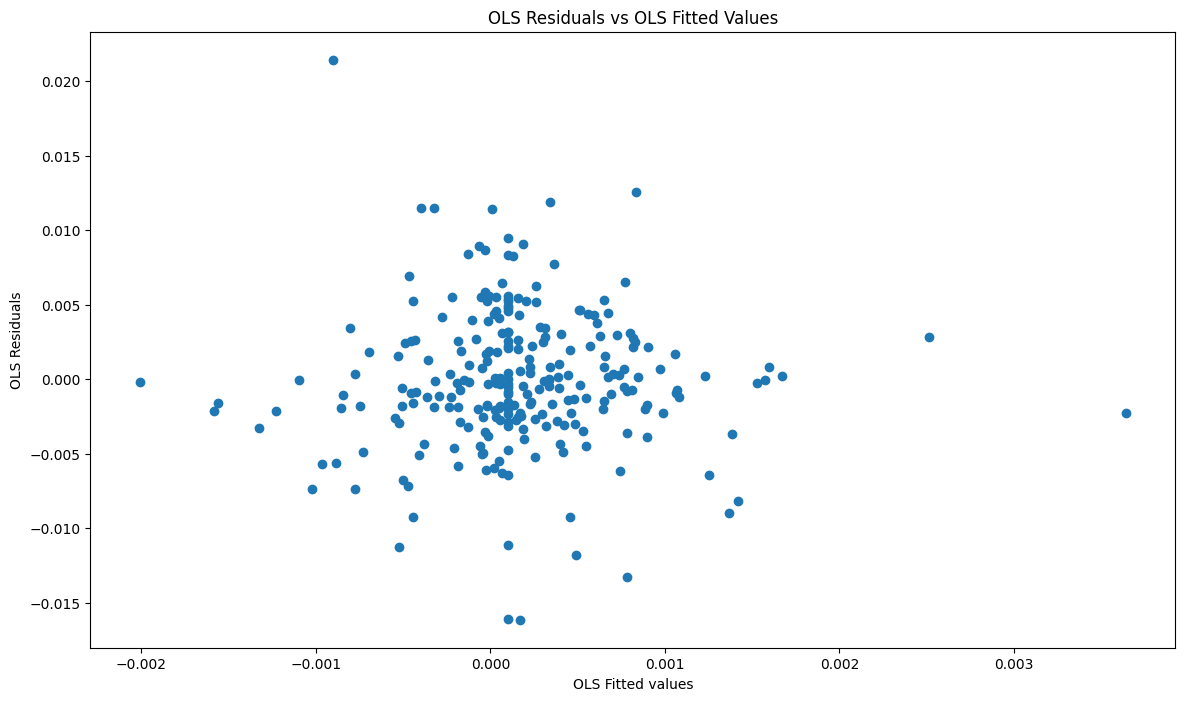

In [8]:
# Scatter Plot for OLS Fitted Values and OLS Residuals

# Fitted values and residuals
model_fitted_y = model_1.fittedvalues
model_resid_y = model_1.resid

# Plot
plt.scatter(x=model_fitted_y, y=model_resid_y)
plt.title("OLS Residuals vs OLS Fitted Values")
plt.xlabel("OLS Fitted values")
plt.ylabel("OLS Residuals")
plt.show()

In [9]:
# Breusch-Pagan Test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model_1.resid, model_1.model.exog)
pd.DataFrame(test, index=name, columns=[""])

Lagrange multiplier statistic  1.918691
p-value                        0.166001
f-value                        1.918062
f p-value                      0.167315

Even though the hyphotesis of heteroskedasticity was rejected, we want to un WLS to compare both models.

In [15]:
# WLS regression result

# Add Absolute residuals and fitted values to dataset columns
data_set["sqrd_residuals"] = np.pow(model_1.resid,2)
data_set["fitted_values"] = model_1.fittedvalues

# Fit OLS model with absolute residuals and fitted values
model_temp = smf.ols("sqrd_residuals ~ fitted_values", data=data_set).fit()

# Compute weights and add it to the data_set column
weights = model_temp.fittedvalues
weights = weights**-2
data_set["weights"] = weights

# Fit WLS model
Y = data_set["DXY"].tolist()
X = data_set["X13W_TB"].tolist()
X = sm.add_constant(X)  # add a intercept point

model_WLS = sm.WLS(Y, X, data_set["weights"]).fit()
model_WLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.039
Model:                            WLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     10.07
Date:                Sun, 23 Nov 2025   Prob (F-statistic):            0.00170
Time:                        20:42:48   Log-Likelihood:                 985.54
No. Observations:                 250   AIC:                            -1967.
Df Residuals:                     248   BIC:                            -1960.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.707      0.480      -0.000       0.001
x1             0.0026      0.001      3.174      0.002       0.001       0.004
==============================================================================
Omnibus:                       13.709   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               34.592
Skew:                          -0.063   Prob(JB):                     3.08e-08
Kurtosis:                       4.818   Cond. No.                         5.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can notice the AIC, BIC are a little bit higher as well as R-squared omproved more than twice.

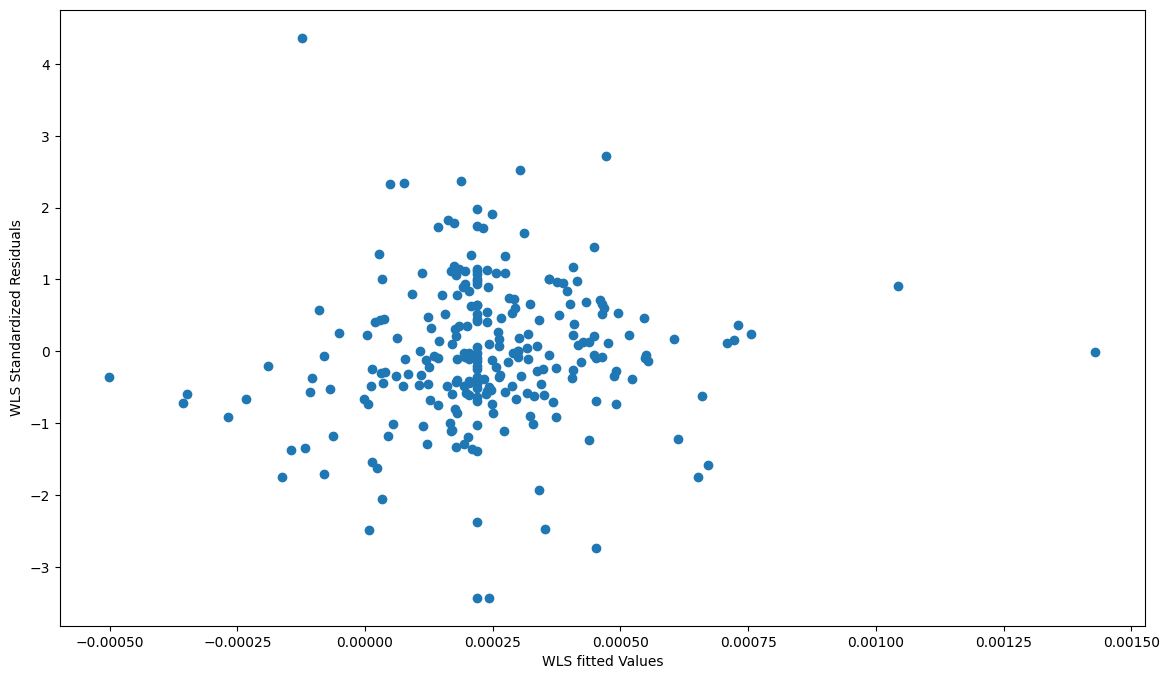

In [16]:
# WLS fitted values and standardized residuals
fitted_valuesWLS = model_WLS.fittedvalues
model_residWLS = model_WLS.resid
std_model_residWLS = model_residWLS / model_residWLS.std(ddof=1)

# Plot WLS fitted v. vs standardized res. scatterplot
plt.scatter(fitted_valuesWLS, std_model_residWLS)
plt.xlabel("WLS fitted Values")
plt.ylabel("WLS Standardized Residuals")
plt.show()

Residual plot seems ok without a megaphone shape. Hence, we conclude WLs was better to OLS model.

In [17]:
# Import data2
data_set2 = pd.read_csv("fin_data_set.csv")

In [19]:
print(data_set2.head())

   Year  Quarter  Yr_Qtr  Risk_F_R  Coke_Q_EX_R  Dow_Q_EX_R  Pepsi_Q_EX_R  \
0  2016        2  2016_2  0.000600    -0.019248    0.036455      0.065220   
1  2016        3  2016_3  0.000737    -0.020989   -0.016461     -0.009568   
2  2016        4  2016_4  0.001250    -0.012537    0.093647     -0.025991   
3  2017        1  2017_1  0.001950     0.045220    0.052239      0.097087   
4  2017        2  2017_2  0.002632     0.068451    0.042763      0.033834   

    REV_Q_R  T_Bill_13W_R  Coke_Q_R  ...   DOW_Q_P   Pepsi_Q_P  GOOG_Q_EX_R  \
0  0.122252         0.240 -0.018648  ...  18432.24   92.683632     0.108749   
1 -0.078516         0.295 -0.020252  ...  18142.42   91.865227     0.019749   
2 -0.115113         0.500 -0.011287  ...  19864.09   89.592361     0.014364   
3 -0.030928         0.780  0.047170  ...  20940.51   98.465363     0.135062   
4  0.064049         1.053  0.071083  ...  21891.12  102.056030     0.024455   

   BAC_Q_EX_R  PFE_Q_EX_R  WMT_Q_EX_R  HD_Q_EX_R  XOM_Q_EX_R  

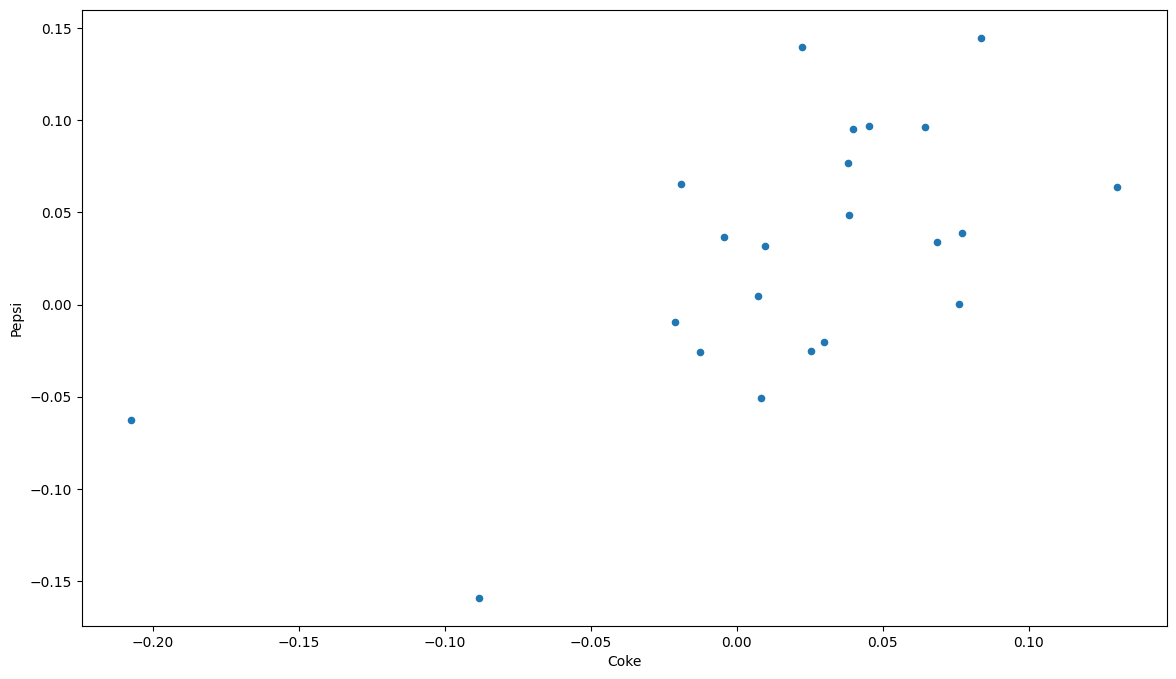

In [23]:
# Create scatter plot
scatt2 = data_set2.plot.scatter(x="Coke_Q_EX_R", y="Pepsi_Q_EX_R")
scatt2.set(xlabel="Coke", ylabel="Pepsi")
plt.show()

In [24]:
# OLS model
model_2 = smf.ols("Coke_Q_EX_R ~ Pepsi_Q_EX_R", data=data_set2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Coke_Q_EX_R   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     11.42
Date:                Sun, 23 Nov 2025   Prob (F-statistic):            0.00298
Time:                        20:54:47   Log-Likelihood:                 33.352
No. Observations:                  22   AIC:                            -62.70
Df Residuals:                      20   BIC:                            -60.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0024      0.013      0.187      0.854      -0.024       0.029
Pepsi_Q_EX_R     0.5783      0.171      3.380      0.003       0.221       0.935
==============================================================================
Omnibus:                       13.659   Durbin-Watson:                   2.432
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.228
Skew:                          -1.265   Prob(JB):                     0.000814
Kurtosis:                       6.021   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Parameters with high precision
print(model_2.summary2().tables[1])

                 Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
Intercept     0.002394  0.012825  0.186678  0.853794 -0.024358  0.029146
Pepsi_Q_EX_R  0.578282  0.171091  3.379958  0.002976  0.221391  0.935172


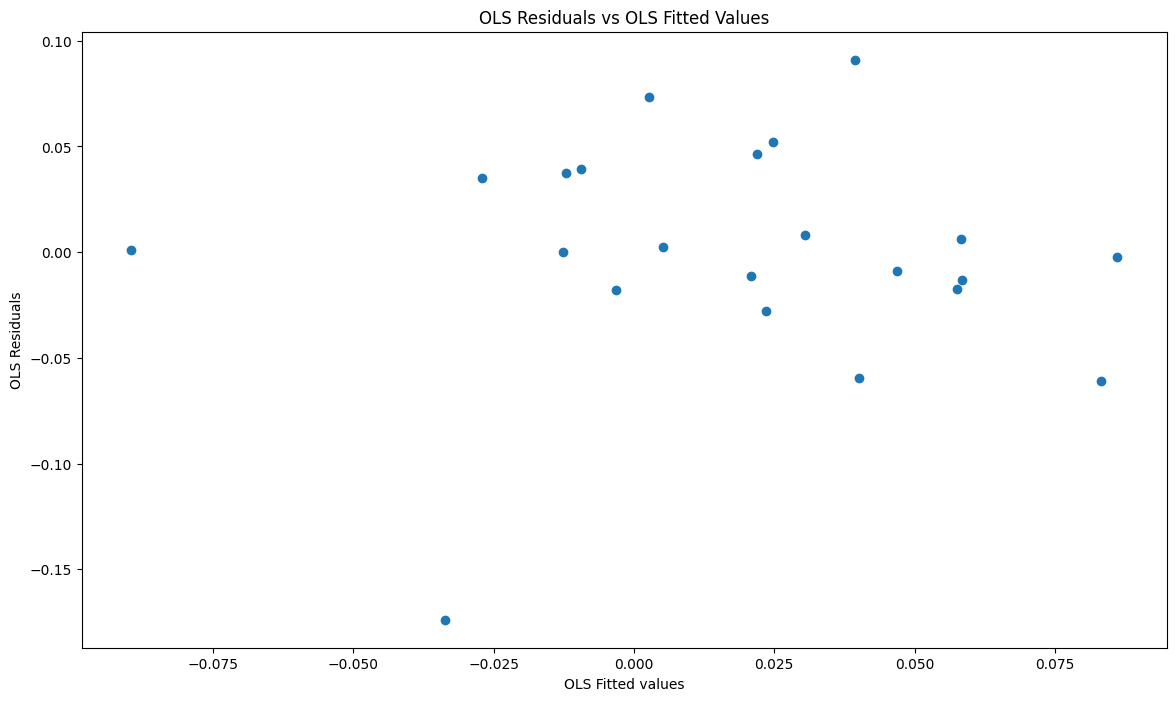

In [26]:
# Scatter Plot for OLS Fitted Values and OLS Residuals

# Fitted values and residuals
model2_fitted_y = model_2.fittedvalues
model2_resid_y = model_2.resid

# Plot
plt.scatter(x=model2_fitted_y, y=model2_resid_y)
plt.title("OLS Residuals vs OLS Fitted Values")
plt.xlabel("OLS Fitted values")
plt.ylabel("OLS Residuals")
plt.show()

Residuals looks well distributed around zero except but perhaps some outlier. We will run the Breusch-Pagan Test to detect heteroskedasticity.

In [27]:
# Breusch-Pagan Test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test2 = sms.het_breuschpagan(model_2.resid, model_2.model.exog)
pd.DataFrame(test2, index=name, columns=[""])

Lagrange multiplier statistic  1.160584
p-value                        0.281344
f-value                        1.113836
f p-value                      0.303833

The heteroskedasticity was rejected. However, a WLS will be run to comparison purposes.

In [31]:
# WLS regression result

# Add Absolute residuals and fitted values to dataset columns
data_set2["abs_residuals"] = np.abs(model_2.resid)
data_set2["fitted_values"] = model_2.fittedvalues

# Fit OLS model with absolute residuals and fitted values
model_temp2 = smf.ols("abs_residuals ~ fitted_values", data=data_set2).fit()

# Compute weights and add it to the data_set column
weights2 = model_temp2.fittedvalues
weights2 = weights2**-2
data_set2["weights"] = weights2

# Fit WLS model
Y2 = data_set2["Coke_Q_EX_R"].tolist()
X2 = data_set2["Pepsi_Q_EX_R"].tolist()
X2 = sm.add_constant(X2)  # add a intercept point

model_WLS2 = sm.WLS(Y2, X2, data_set2["weights"]).fit()
model_WLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.301
Model:                            WLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     8.622
Date:                Sun, 23 Nov 2025   Prob (F-statistic):            0.00816
Time:                        21:07:50   Log-Likelihood:                 34.793
No. Observations:                  22   AIC:                            -65.59
Df Residuals:                      20   BIC:                            -63.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.014      0.394      0.698      -0.023       0.034
x1             0.4904      0.167      2.936      0.008       0.142       0.839
==============================================================================
Omnibus:                        7.874   Durbin-Watson:                   2.385
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                5.960
Skew:                          -0.834   Prob(JB):                       0.0508
Kurtosis:                       4.928   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dispite of AIC and BIC are lower on WLS2 model vs OLS 2, there is no a notable improvement on R-squared, but in contrady will be litlle bit lower for WLS2. Therefore, we conclude in this case was better OLS2 model.